In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
import warnings
warnings.filterwarnings("ignore")

In [53]:
df = pd.read_csv('four_city_data.csv')

In [54]:
df

,city,state,zipcode,bathrooms,bedrooms,area,year,price
0,Dallas,TX,75240,2.0,3.0,1494.0,1969.0,1995
1,Dallas,TX,75229,3.0,3.0,1547.0,NaN,1695
2,Dallas,TX,75229,2.0,3.0,1710.0,1958.0,2100
3,Dallas,TX,75219,1.0,1.0,655.0,1981.0,1095
4,Dallas,TX,75229,2.0,3.0,2556.0,1958.0,3450
...,...,...,...,...,...,...,...,...
2029,Los Angeles,CA,90731,1.0,2.0,850.0,NaN,2150
2030,Los Angeles,CA,91316,3.0,2.0,1564.0,1989.0,4200
2031,Los Angeles,CA,90049,3.0,4.0,2149.0,1937.0,22500
2032,Los Angeles,CA,90210,3.0,3.0,1404.0,1947.0,6995


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2034 entries, 0 to 2033
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   city       2034 non-null   object 
 1   state      2034 non-null   object 
 2   zipcode    2034 non-null   int64  
 3   bathrooms  2032 non-null   float64
 4   bedrooms   1913 non-null   float64
 5   area       1811 non-null   float64
 6   year       1255 non-null   float64
 7   price      2034 non-null   int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 127.2+ KB


In [56]:
df.shape

(2034, 8)

### Change data types

In [57]:
# fix zipcode data type
df['zipcode'] = df['zipcode'].astype(str)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2034 entries, 0 to 2033
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   city       2034 non-null   object 
 1   state      2034 non-null   object 
 2   zipcode    2034 non-null   object 
 3   bathrooms  2032 non-null   float64
 4   bedrooms   1913 non-null   float64
 5   area       1811 non-null   float64
 6   year       1255 non-null   float64
 7   price      2034 non-null   int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 127.2+ KB


### Sanity check & Data cleaning

In [59]:
# fix cities
df['city'].value_counts()

Los Angeles      533
Seattle          501
San Francisco    500
Dallas           497
Carrollton         2
Grand Prairie      1
Name: city, dtype: int64

In [60]:
df['city'] = df['city'].apply(lambda x: x.replace('Carrollton', 'Dallas'))

In [61]:
df['city'] = df['city'].apply(lambda x: x.replace('Grand Prairie', 'Dallas'))

In [62]:
df['city'].value_counts()

Los Angeles      533
Seattle          501
Dallas           500
San Francisco    500
Name: city, dtype: int64

In [63]:
df['state'].value_counts()

CA    1033
WA     501
TX     500
Name: state, dtype: int64

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2034 entries, 0 to 2033
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   city       2034 non-null   object 
 1   state      2034 non-null   object 
 2   zipcode    2034 non-null   object 
 3   bathrooms  2032 non-null   float64
 4   bedrooms   1913 non-null   float64
 5   area       1811 non-null   float64
 6   year       1255 non-null   float64
 7   price      2034 non-null   int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 127.2+ KB


### Check distributions for numeric variables

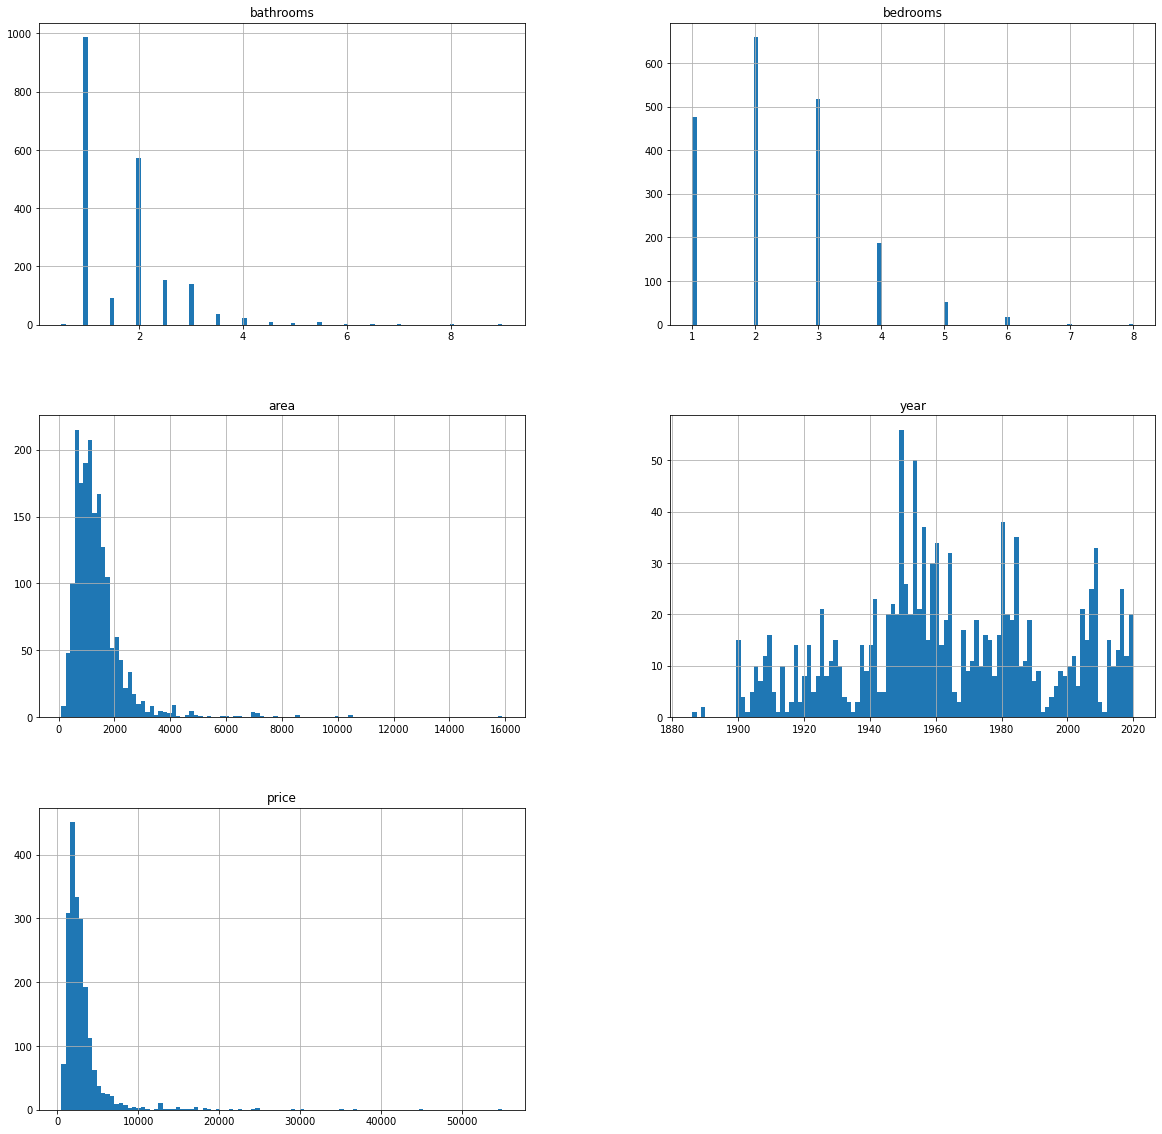

In [65]:
# bathrooms: mostly 1 or 2
# bedrooms: mostly under and including 3
# area: a very wide range, and majority are concentrated under 2000 (need to take a closer look)
# year: range: 1900 to 2020; almost normally distributed, but concentrate at 1950-1960
# price: same as area, has a very long right tail, but primarily concentrate at below 5000
df.hist(bins=100, figsize=[20, 20])
plt.show()

##### (median value for each numeric variable)

In [66]:
# median value of "price" and "area"
print('median price value: ', '$',df['price'].median())
print('median area value: ', df['area'].median(), 'square ft')
print('median year value: ', df['year'].median())
print('median bedroom number: ', df['bedrooms'].median())
print('median bathroom number: ', df['bathrooms'].median())

median price value:  $ 2450.0
median area value:  1200.0 square ft
median year value:  1961.0
median bedroom number:  2.0
median bathroom number:  1.5


### Missing values

In [67]:
df.isnull().sum()

city           0
state          0
zipcode        0
bathrooms      2
bedrooms     121
area         223
year         779
price          0
dtype: int64

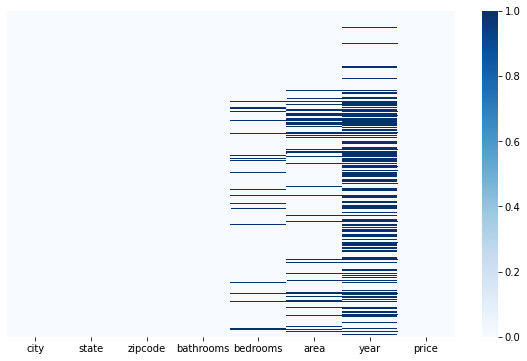

In [68]:
# significant amount of missing values for specific variables
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), yticklabels=False, cmap="Blues")

### Check linear relationships between independent variables and predictor

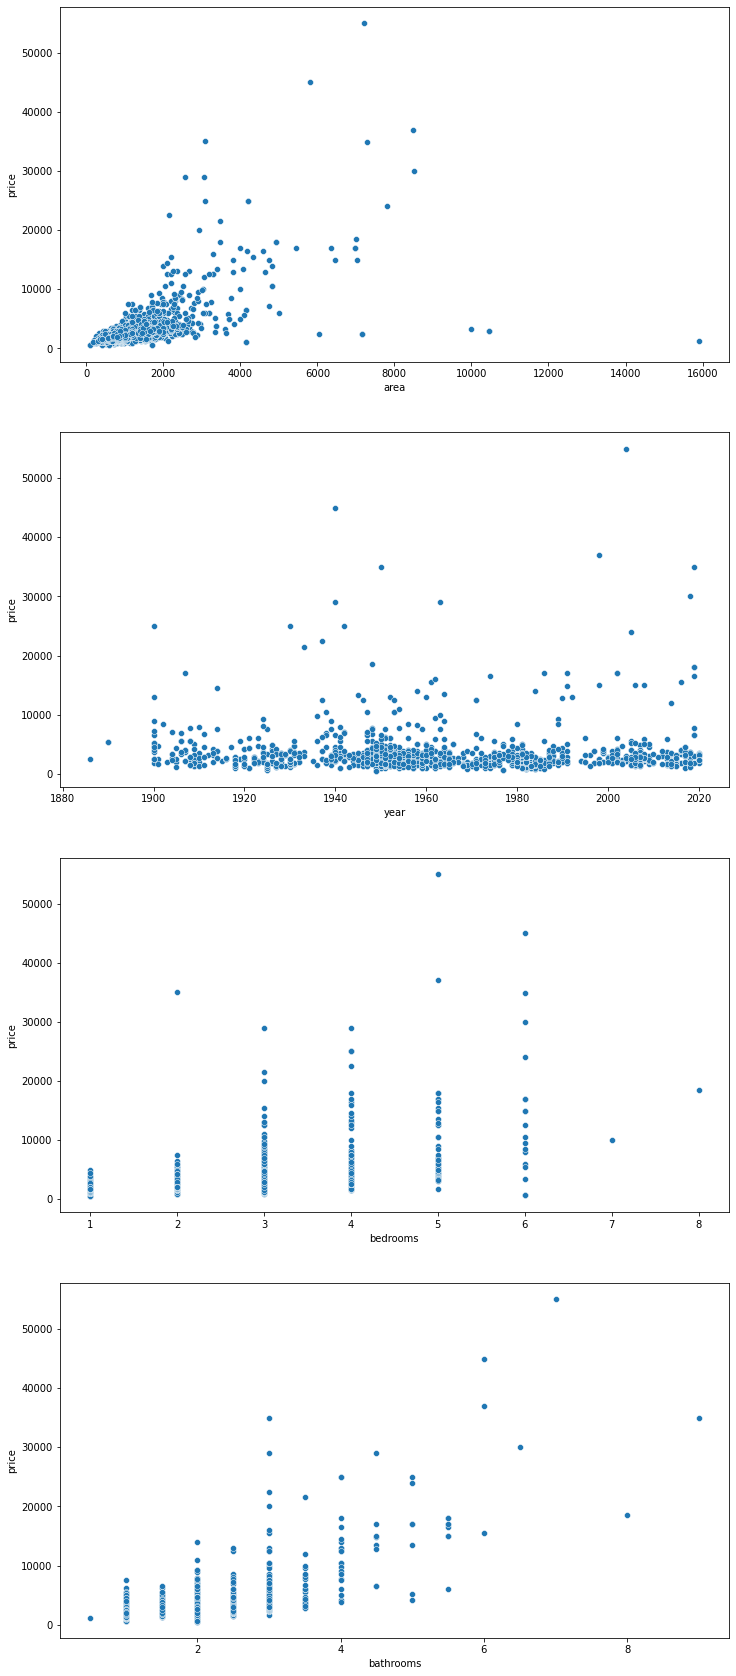

In [69]:
# check linear relationship between 4 variables and "price"
plt.figure(figsize=[12,30])
plt.subplot(411)
sns.scatterplot(data=df, x='area', y='price')
plt.subplot(412)
sns.scatterplot(data=df, x='year', y='price')
plt.subplot(413)
sns.scatterplot(data=df, x='bedrooms', y='price')
plt.subplot(414)
sns.scatterplot(data=df, x='bathrooms', y='price')

In [70]:
# graphs are stretched by extreme large values, need to zoom in

[(0.0, 6000.0)]

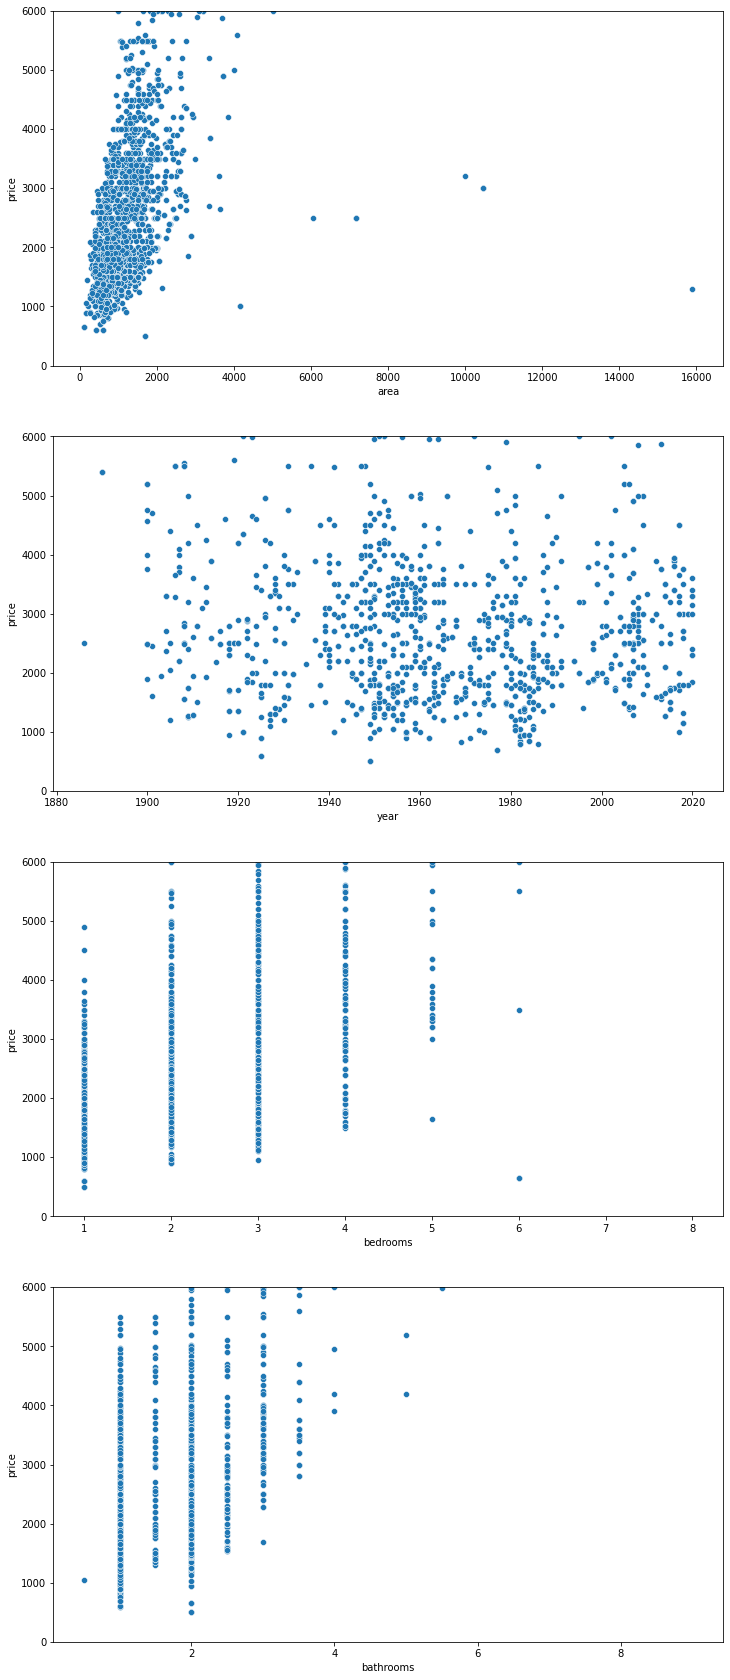

In [71]:
# zoom in, ylim = (0, 6000)
plt.figure(figsize=[12,30])
plt.subplot(411)
ax = sns.scatterplot(data=df, x='area', y='price')
ax.set(ylim=(0,6000))
plt.subplot(412)
ax = sns.scatterplot(data=df, x='year', y='price')
ax.set(ylim=(0,6000))
plt.subplot(413)
ax = sns.scatterplot(data=df, x='bedrooms', y='price')
ax.set(ylim=(0,6000))
plt.subplot(414)
ax = sns.scatterplot(data=df, x='bathrooms', y='price')
ax.set(ylim=(0,6000))

# strong linear relationship between "area" and "price"; visible linear relationship between rooms and "price", no clear relationship between "year" and "price"

### Outliers

##### (first, see some extreme values)

In [72]:
# the most expensive
df[df['price'] == df['price'].max()]
# A relatively new hosue with 5 bedrooms and 7 bathrooms with a size of 7200 square ft - makes sense

,city,state,zipcode,bathrooms,bedrooms,area,year,price
1995,Los Angeles,CA,90272,7.0,5.0,7200.0,2004.0,55000


In [73]:
# the largest
df[df['area'] == df['area'].max()]
# 1B1B that is 15900 square ft - gotta be wrong

,city,state,zipcode,bathrooms,bedrooms,area,year,price
1829,Los Angeles,CA,90731,1.0,1.0,15900.0,1973.0,1295


In [74]:
# diagnostic plots

In [75]:
# function to create histogram, Q-Q plot and
# boxplot. We learned this in section 3 of the course

# for Q-Q plots
import scipy.stats as stats

def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

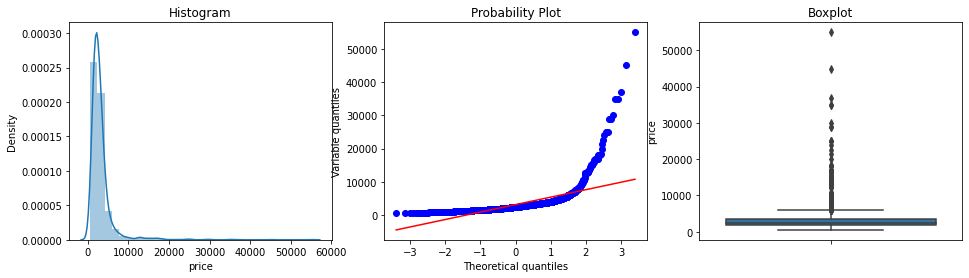

In [76]:
# let's find outliers in "price"

diagnostic_plots(df, 'price')

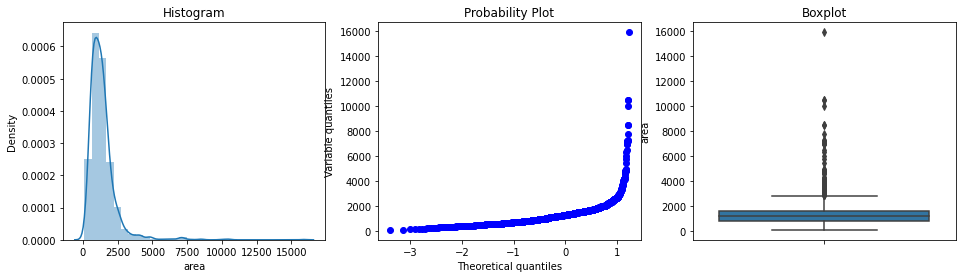

In [77]:
# "area"
diagnostic_plots(df, 'area')

In [78]:
# trim the outliers, for variables "price" and "area"

In [79]:
# find the boundaries
def find_skewed_boundaries(df, variable, distance):

    # Let's calculate the boundaries outside which sit the outliers
    # for skewed distributions

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [80]:
# limits for "price"
price_upper_limit, price_lower_limit = find_skewed_boundaries(df, 'price', 2)
price_upper_limit, price_lower_limit

(6700.0, -1550.0)

In [81]:
# how many data points are above that upper limit
len(df[df['price'] > price_upper_limit])

103

In [82]:
# take a glance at the data that are beyond the upper limit
df[df['price'] > price_upper_limit]

,city,state,zipcode,bathrooms,bedrooms,area,year,price
17,Dallas,TX,75220,4.0,4.0,3232.0,2019.0,7800
28,Dallas,TX,75230,5.5,6.0,7023.0,1998.0,15000
90,Dallas,TX,75218,3.0,5.0,3300.0,1971.0,12500
91,Dallas,TX,75218,3.0,5.0,3300.0,1971.0,12500
129,Dallas,TX,75230,4.0,5.0,4815.0,1953.0,10500
...,...,...,...,...,...,...,...,...
1998,Los Angeles,CA,91436,6.5,6.0,8500.0,2018.0,30000
2007,Los Angeles,CA,90272,2.0,3.0,1900.0,1924.0,9300
2014,Los Angeles,CA,90402,6.0,6.0,5800.0,1940.0,45000
2031,Los Angeles,CA,90049,3.0,4.0,2149.0,1937.0,22500


In [83]:
# limits for "area"
area_upper_limit, area_lower_limit = find_skewed_boundaries(df, 'area', 2)
area_upper_limit, area_lower_limit

(3284.0, -856.0)

In [84]:
# how many data points are above that upper limit
len(df[df['area'] > area_upper_limit])

61

In [85]:
# take a glance at the data that are beyond the upper limit
df[df['area'] > area_upper_limit]

,city,state,zipcode,bathrooms,bedrooms,area,year,price
19,Dallas,TX,75206,3.5,4.0,3684.0,2013.0,5875
28,Dallas,TX,75230,5.5,6.0,7023.0,1998.0,15000
90,Dallas,TX,75218,3.0,5.0,3300.0,1971.0,12500
91,Dallas,TX,75218,3.0,5.0,3300.0,1971.0,12500
129,Dallas,TX,75230,4.0,5.0,4815.0,1953.0,10500
...,...,...,...,...,...,...,...,...
1966,Los Angeles,CA,90272,4.5,5.0,3800.0,2006.0,15000
1974,Los Angeles,CA,90049,4.0,4.0,4831.0,1984.0,13995
1995,Los Angeles,CA,90272,7.0,5.0,7200.0,2004.0,55000
1998,Los Angeles,CA,91436,6.5,6.0,8500.0,2018.0,30000


In [86]:
# flag the outliers
outliers_price = np.where(df['price'] > price_upper_limit, True,
                       np.where(df['price'] < price_lower_limit, True, False))
outliers_area = np.where(df['area'] > area_upper_limit, True,
                       np.where(df['area'] < area_lower_limit, True, False))

In [87]:
df_trimmed = df.loc[~(outliers_price + outliers_area), ]

In [88]:
df.shape, df_trimmed.shape
# trimmed about 100 records (5%)

((2034, 8), (1907, 8))

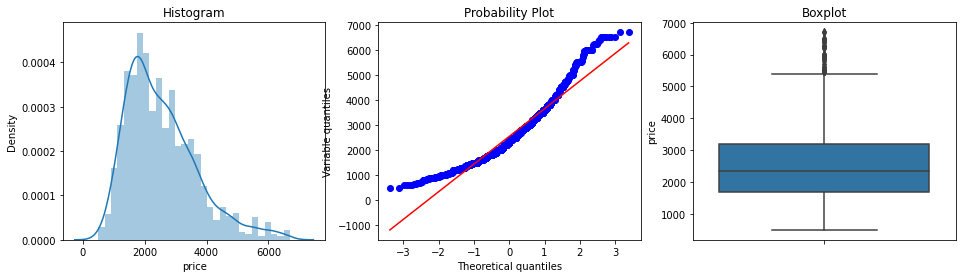

In [89]:
# check the diagnostic plots again
diagnostic_plots(df_trimmed, 'price')

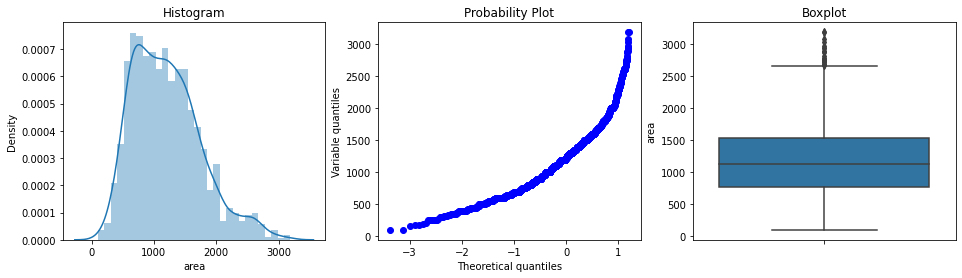

In [90]:
diagnostic_plots(df_trimmed, 'area')

In [91]:
df_trimmed.to_csv('df_trimmed_outliers.csv', index=False)

In [92]:
df = df_trimmed

In [93]:
df.shape

(1907, 8)

In [94]:
df

,city,state,zipcode,bathrooms,bedrooms,area,year,price
0,Dallas,TX,75240,2.0,3.0,1494.0,1969.0,1995
1,Dallas,TX,75229,3.0,3.0,1547.0,NaN,1695
2,Dallas,TX,75229,2.0,3.0,1710.0,1958.0,2100
3,Dallas,TX,75219,1.0,1.0,655.0,1981.0,1095
4,Dallas,TX,75229,2.0,3.0,2556.0,1958.0,3450
...,...,...,...,...,...,...,...,...
2027,Los Angeles,CA,91411,2.0,3.0,1502.0,1949.0,4700
2028,Los Angeles,CA,90011,1.0,2.0,700.0,1935.0,2150
2029,Los Angeles,CA,90731,1.0,2.0,850.0,NaN,2150
2030,Los Angeles,CA,91316,3.0,2.0,1564.0,1989.0,4200


### Something Interesting (between predictor and categorical variables)

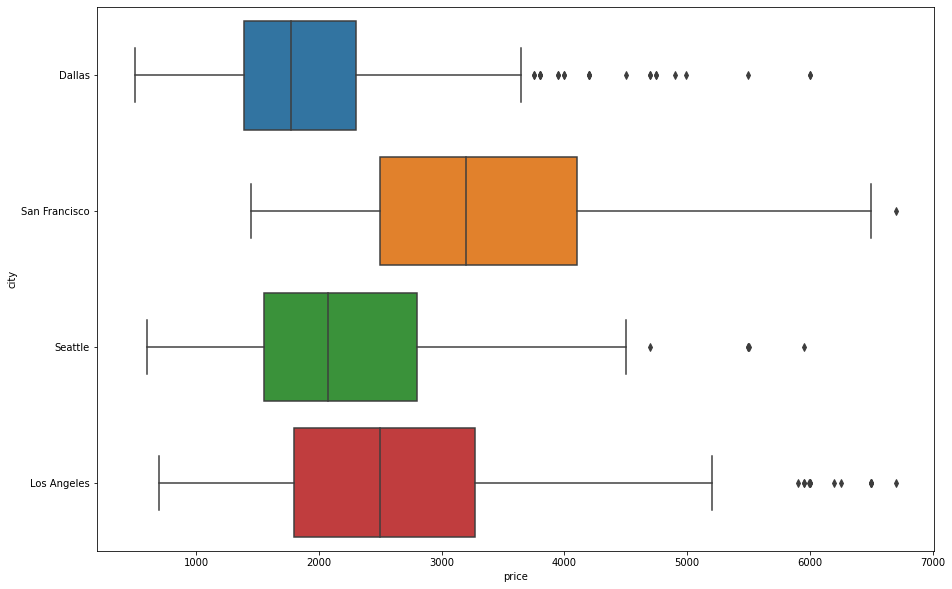

In [95]:
# price per city
plt.figure(figsize=(15, 10))
sns.boxplot(x = 'price', y = 'city', data = df)

In [96]:
# median price per city
dal = df[df['city'] == 'Dallas']
sf = df[df['city'] == 'San Francisco']
la = df[df['city'] == 'Los Angeles']
sea = df[df['city'] == 'Seattle']

print('Dallas: ', '$', dal['price'].median())
print('San Francisco: ', '$', sf['price'].median())
print('Los Angeles: ', '$', la['price'].median())
print('Seattle: ', '$', sea['price'].median())

Dallas:  $ 1775.0
San Francisco:  $ 3195.0
Los Angeles:  $ 2500.0
Seattle:  $ 2075.0


In [97]:
# median year per city
print('Dallas: ', dal['year'].median())
print('San Francisco: ', sf['year'].median())
print('Los Angeles: ', la['year'].median())
print('Seattle: ', sea['year'].median())

Dallas:  1969.0
San Francisco:  1940.0
Los Angeles:  1961.0
Seattle:  1963.0


In [98]:
# median area per city
print('Dallas: ', dal['area'].median(), 'sq ft')
print('San Francisco: ', sf['area'].median(), 'sq ft')
print('Los Angeles: ', la['area'].median(), 'sq ft')
print('Seattle: ', sea['area'].median(), 'sq ft')

Dallas:  1369.0 sq ft
San Francisco:  940.0 sq ft
Los Angeles:  1185.0 sq ft
Seattle:  1000.0 sq ft


In [99]:
# calculate $ per sq ft

df['price_per_area'] = df['price']/df['area']

In [100]:
df

,city,state,zipcode,bathrooms,bedrooms,area,year,price,price_per_area
0,Dallas,TX,75240,2.0,3.0,1494.0,1969.0,1995,1.335341
1,Dallas,TX,75229,3.0,3.0,1547.0,NaN,1695,1.095669
2,Dallas,TX,75229,2.0,3.0,1710.0,1958.0,2100,1.228070
3,Dallas,TX,75219,1.0,1.0,655.0,1981.0,1095,1.671756
4,Dallas,TX,75229,2.0,3.0,2556.0,1958.0,3450,1.349765
...,...,...,...,...,...,...,...,...,...
2027,Los Angeles,CA,91411,2.0,3.0,1502.0,1949.0,4700,3.129161
2028,Los Angeles,CA,90011,1.0,2.0,700.0,1935.0,2150,3.071429
2029,Los Angeles,CA,90731,1.0,2.0,850.0,NaN,2150,2.529412
2030,Los Angeles,CA,91316,3.0,2.0,1564.0,1989.0,4200,2.685422


In [101]:
dal = df[df['city'] == 'Dallas']
sf = df[df['city'] == 'San Francisco']
la = df[df['city'] == 'Los Angeles']
sea = df[df['city'] == 'Seattle']

In [102]:
# $ per area per city
print('Dallas: ', '$', round(dal['price_per_area'].median(), 2), 'per sq ft')
print('SF: ', '$', round(sf['price_per_area'].median(), 2), 'per sq ft')
print('LA: ', '$', round(la['price_per_area'].median(), 2), 'per sq ft')
print('Seattle: ', '$', round(sea['price_per_area'].median(), 2), 'per sq ft')

Dallas:  $ 1.35 per sq ft
SF:  $ 3.6 per sq ft
LA:  $ 2.33 per sq ft
Seattle:  $ 2.14 per sq ft


In [103]:
df.drop(columns = ['price_per_area'], inplace=True)

In [104]:
df

,city,state,zipcode,bathrooms,bedrooms,area,year,price
0,Dallas,TX,75240,2.0,3.0,1494.0,1969.0,1995
1,Dallas,TX,75229,3.0,3.0,1547.0,NaN,1695
2,Dallas,TX,75229,2.0,3.0,1710.0,1958.0,2100
3,Dallas,TX,75219,1.0,1.0,655.0,1981.0,1095
4,Dallas,TX,75229,2.0,3.0,2556.0,1958.0,3450
...,...,...,...,...,...,...,...,...
2027,Los Angeles,CA,91411,2.0,3.0,1502.0,1949.0,4700
2028,Los Angeles,CA,90011,1.0,2.0,700.0,1935.0,2150
2029,Los Angeles,CA,90731,1.0,2.0,850.0,NaN,2150
2030,Los Angeles,CA,91316,3.0,2.0,1564.0,1989.0,4200


In [105]:
df['zipcode'].value_counts()

94117    131
94122    110
98116     85
94114     73
98144     72
        ... 
75236      1
98178      1
91607      1
90077      1
91601      1
Name: zipcode, Length: 132, dtype: int64

In [106]:
# focus on small apartments for young woring professionals
small_apartments = df[(df['bathrooms']==1) & (df['bedrooms']==1)]

In [107]:
small_apartments

,city,state,zipcode,bathrooms,bedrooms,area,year,price
3,Dallas,TX,75219,1.0,1.0,655.0,1981.0,1095
21,Dallas,TX,75252,1.0,1.0,600.0,1984.0,1250
24,Dallas,TX,75219,1.0,1.0,957.0,1930.0,1195
29,Dallas,TX,75206,1.0,1.0,578.0,NaN,975
30,Dallas,TX,75234,1.0,1.0,661.0,1982.0,850
...,...,...,...,...,...,...,...,...
1996,Los Angeles,CA,90731,1.0,1.0,560.0,1918.0,1700
2002,Los Angeles,CA,90037,1.0,1.0,NaN,NaN,1650
2010,Los Angeles,CA,90232,1.0,1.0,700.0,1947.0,2000
2019,Los Angeles,CA,90037,1.0,1.0,NaN,NaN,1650


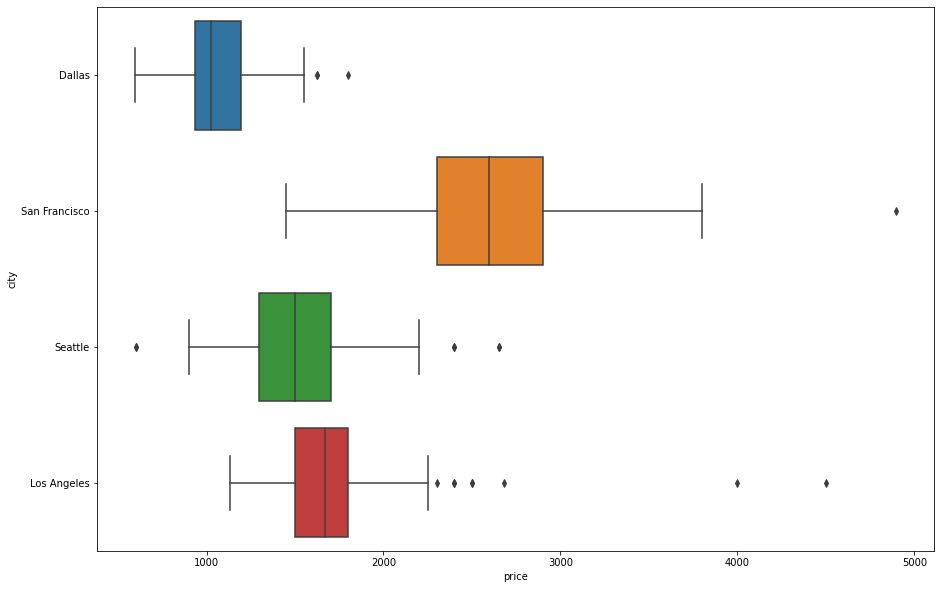

In [108]:
# small apartment price per city
plt.figure(figsize=(15, 10))
sns.boxplot(x = 'price', y = 'city', data = small_apartments)

In [109]:
# median price for small apartments per city
dal = small_apartments[small_apartments['city'] == 'Dallas']
sf = small_apartments[small_apartments['city'] == 'San Francisco']
la = small_apartments[small_apartments['city'] == 'Los Angeles']
sea = small_apartments[small_apartments['city'] == 'Seattle']

print('Dallas: ', '$', dal['price'].median())
print('San Francisco: ', '$', sf['price'].median())
print('Los Angeles: ', '$', la['price'].median())
print('Seattle: ', '$', sea['price'].median())

# Dallas is way more friendly for young people

Dallas:  $ 1025.0
San Francisco:  $ 2595.0
Los Angeles:  $ 1668.0
Seattle:  $ 1500.0
